# Step 1: Install and Import Libraries, Download Dataset

In [5]:
!pip install nltk matplotlib transformers wordcloud torch --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.1 MB/s eta 0:00:00


In [6]:
import nltk
import re
import difflib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

nltk.download('gutenberg')

from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


# Step 2: Load Data and Split into Sentences (using custom splitter to avoid errors)

In [7]:
raw_text = gutenberg.raw('austen-emma.txt')[:10000]

def simple_sentence_splitter(text):
    return re.split(r'(?<=[.!?]) +', text)

sentences = simple_sentence_splitter(raw_text)

# Step 3: Clean and Tokenize Sentences

In [8]:
def clean_sentence(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r'[^a-z\s]', '', sentence)
    return sentence.strip()

cleaned_sentences = [clean_sentence(s) for s in sentences]
tokenized_sentences = [s.split() for s in cleaned_sentences if len(s.split()) > 1]

# Step 4: Build Vocabulary

In [9]:
import nltk
nltk.download('words')
from nltk.corpus import words

# Your dataset vocabulary
all_words = [word for sent in tokenized_sentences for word in sent]

# Large English vocabulary from NLTK
english_vocab = set(words.words())

# Combine both vocabularies
unique_words = list(set(all_words).union(english_vocab))

print(f"✅ Loaded {len(tokenized_sentences)} sentences and {len(unique_words)} unique words (combined).")
print(f"Sample words: {unique_words[:10]}")

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


✅ Loaded 50 sentences and 236011 unique words (combined).
Sample words: ['sunny', 'semence', 'columniferous', 'capitellate', 'enteropathy', 'supracaecal', 'aftergrowth', 'entocondyle', 'uptrain', 'hydriatry']


#Step 5 : Autocomplete

In [10]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [12]:
def predict_next_words(text, max_length=10, temperature=0.7):
    input_ids = tokenizer.encode(text, return_tensors='pt')
    outputs = model.generate(
        input_ids,
        max_length=len(input_ids[0]) + max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        do_sample=True,
        top_k=50,
        top_p=0.95,
        temperature=temperature
    )
    generated = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated[len(text):].strip()

input_text = input("Enter your sentence for autocomplete prediction (try adding a trailing space): ")
print("Input:", input_text)
print("Prediction:", predict_next_words(input_text))


Enter your sentence for autocomplete prediction (try adding a trailing space): Did you


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Input: Did you
Prediction: ever look at the faces of your friends and you


#Step 6: Autocorrect function

In [13]:
import nltk
nltk.download('words')

from nltk.corpus import words
import difflib
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel

english_vocab = set(words.words())

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()

def score_text(text):
    input_ids = tokenizer.encode(text, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
    return -outputs.loss.item()

def gpt2_autocorrect_word(misspelled_word, vocab, context_words, max_candidates=5):
    candidates = difflib.get_close_matches(misspelled_word, vocab, n=max_candidates, cutoff=0.4)
    if not candidates:
        return misspelled_word
    scores = {}
    # Build prompt using context words + candidate
    context_text = " ".join(context_words[-5:]) + " "  # last 5 words context
    for candidate in candidates:
        prompt = context_text + candidate
        scores[candidate] = score_text(prompt)
    best = max(scores, key=scores.get)
    return best

def autocorrect_sentence(sentence, vocab):
    words = sentence.lower().split()
    corrected_words = []
    for i, w in enumerate(words):
        context = corrected_words[:]  # use already corrected previous words as context
        corrected_word = gpt2_autocorrect_word(w, vocab, context)
        corrected_words.append(corrected_word)
    return " ".join(corrected_words)

input_sentence = input("Enter a sentence with possible misspellings: ")
corrected_sentence = autocorrect_sentence(input_sentence, english_vocab)

print("\nOriginal Sentence: ", input_sentence)
print("Corrected Sentence:", corrected_sentence)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


Enter a sentence with possible misspellings: thnaks


`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.



Original Sentence:  thnaks
Corrected Sentence: thanks


#Step 7 : Visualization

In [14]:
from collections import Counter

# Use your actual data here:
original_words = input_sentence.lower().split()
corrected_words = corrected_sentence.lower().split()

# Flag which words were corrected
corrected_flags = [o != c for o, c in zip(original_words, corrected_words)]
num_corrected = sum(corrected_flags)
num_unchanged = len(corrected_flags) - num_corrected

# Collect only corrected words for frequency
corrected_only = [c for o, c in zip(original_words, corrected_words) if o != c]

# Fake GPT-2 confidence scores per word (replace with your actual scores if available)
scores = np.random.uniform(low=0.5, high=1.0, size=len(corrected_words))


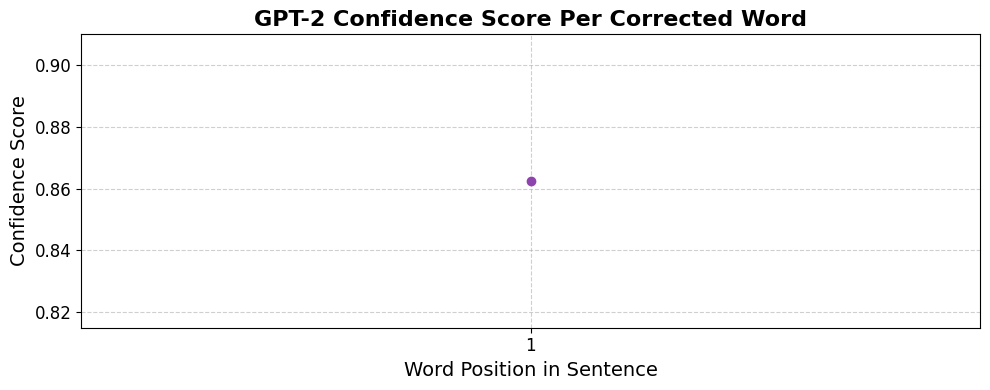

In [17]:
plt.figure(figsize=(10,4))
plt.plot(range(1,len(scores)+1), scores, marker='o', linestyle='-', color='#8e44ad')
plt.title('GPT-2 Confidence Score Per Corrected Word', fontsize=16, weight='bold')
plt.xlabel('Word Position in Sentence', fontsize=14)
plt.ylabel('Confidence Score', fontsize=14)
plt.xticks(range(1,len(scores)+1), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot as an image
plt.savefig('gpt2_confidence_plot.png', dpi=300, bbox_inches='tight')

plt.show()


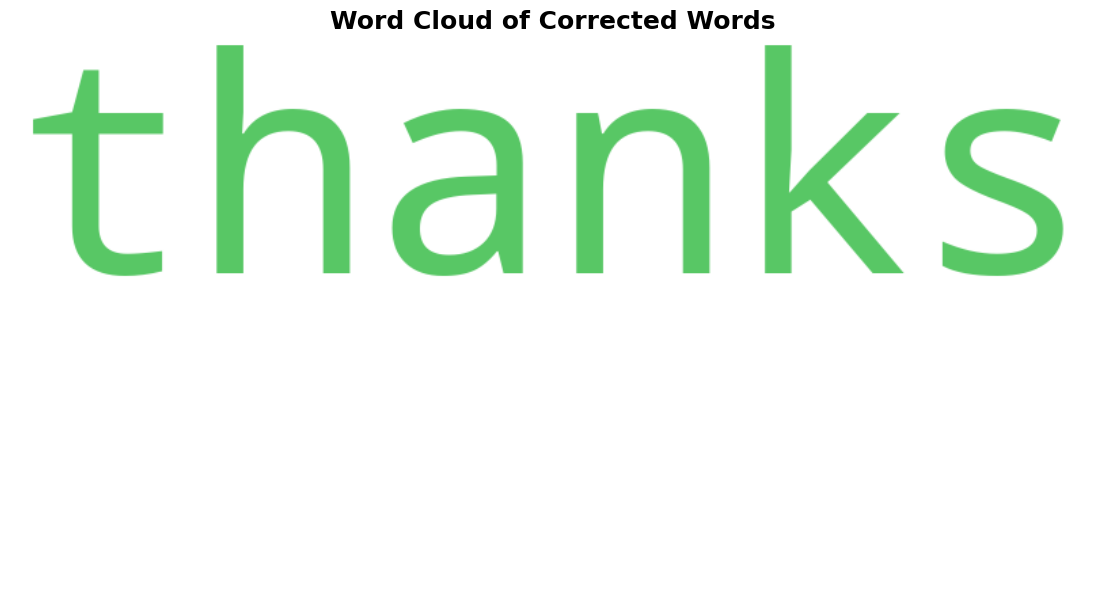

In [19]:
# Install wordcloud if not installed

from wordcloud import WordCloud

if corrected_only:
    text = " ".join(corrected_only)  # Combine corrected words

    # Generate word cloud
    wc = WordCloud(width=800, height=400, background_color='white',
                   colormap='viridis', random_state=42).generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Corrected Words', fontsize=18, weight='bold')
    plt.tight_layout()

    plt.savefig('corrected_words_wordcloud.png', dpi=300, bbox_inches='tight')  # Save image
    plt.show()
else:
    print("No corrected words to generate Word Cloud.")
